# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [1]:
import numpy
import matplotlib.pyplot as plt

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

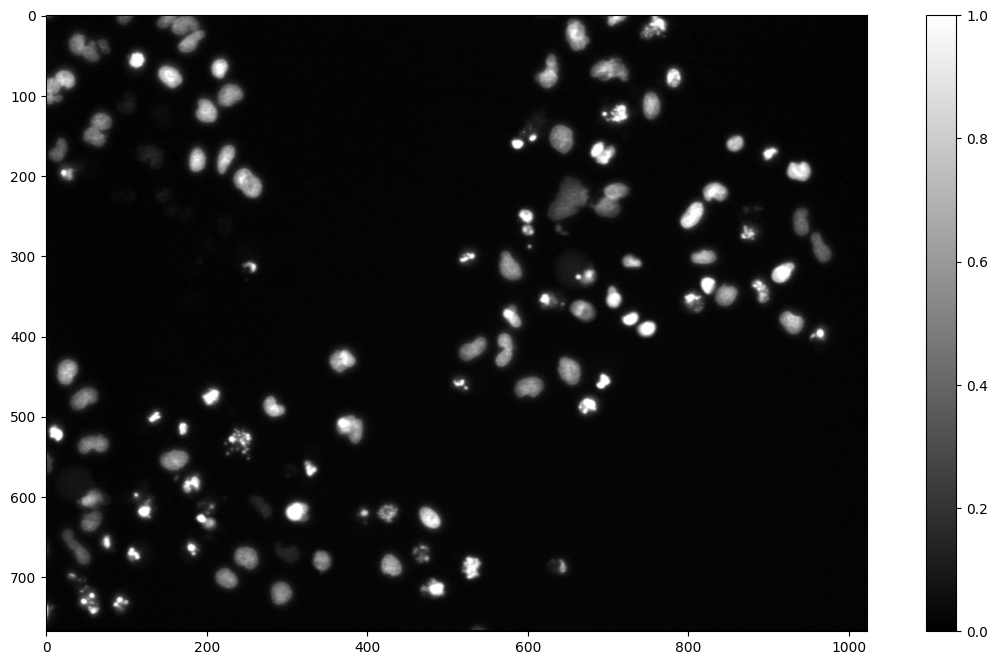

In [2]:
img = plt.imread("data/cells.png")
plt.figure(figsize=(15,8))
plt.imshow(img, "gray")
plt.colorbar()


---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

(array([705771.,  23593.,  12589.,  10115.,   9097.,   7896.,   5675.,
          3669.,   2568.,   5459.]),
 array([0.        , 0.1       , 0.2       , 0.30000001, 0.40000001,
        0.5       , 0.60000002, 0.69999999, 0.80000001, 0.89999998,
        1.        ]),
 <BarContainer object of 10 artists>)

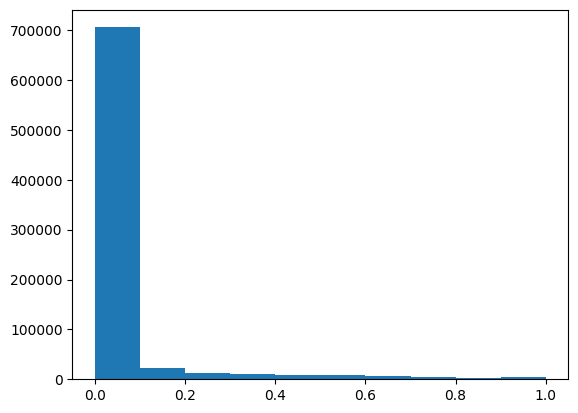

In [3]:
seq=img.flatten()
plt.hist(seq)

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [4]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

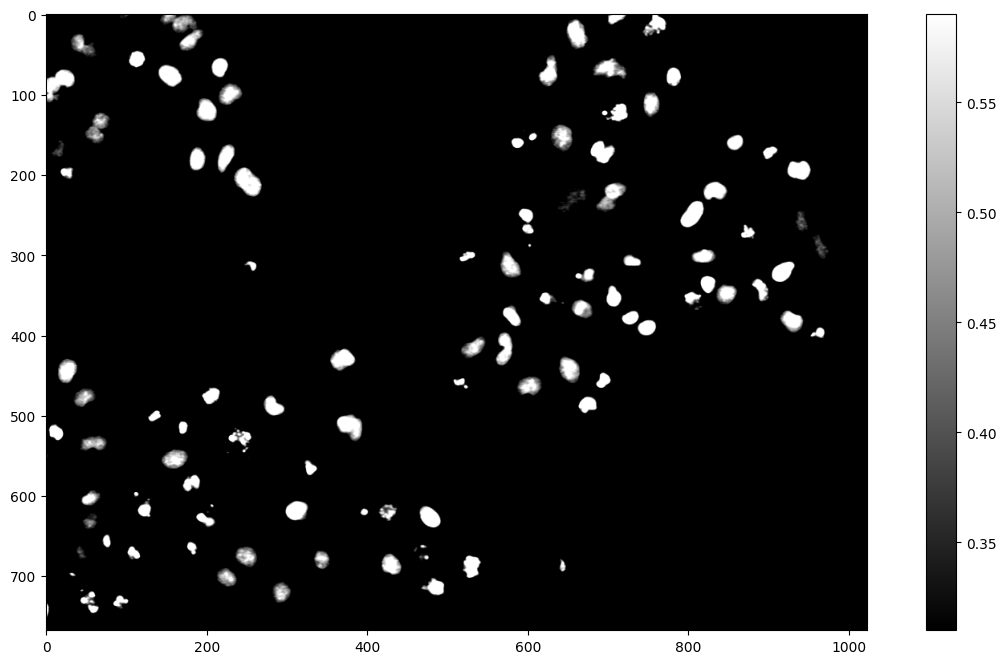

In [5]:
imgc1=img.clip(T1, T2)
plt.figure(figsize=(15,8))
plt.imshow(imgc1, "gray")
plt.colorbar()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

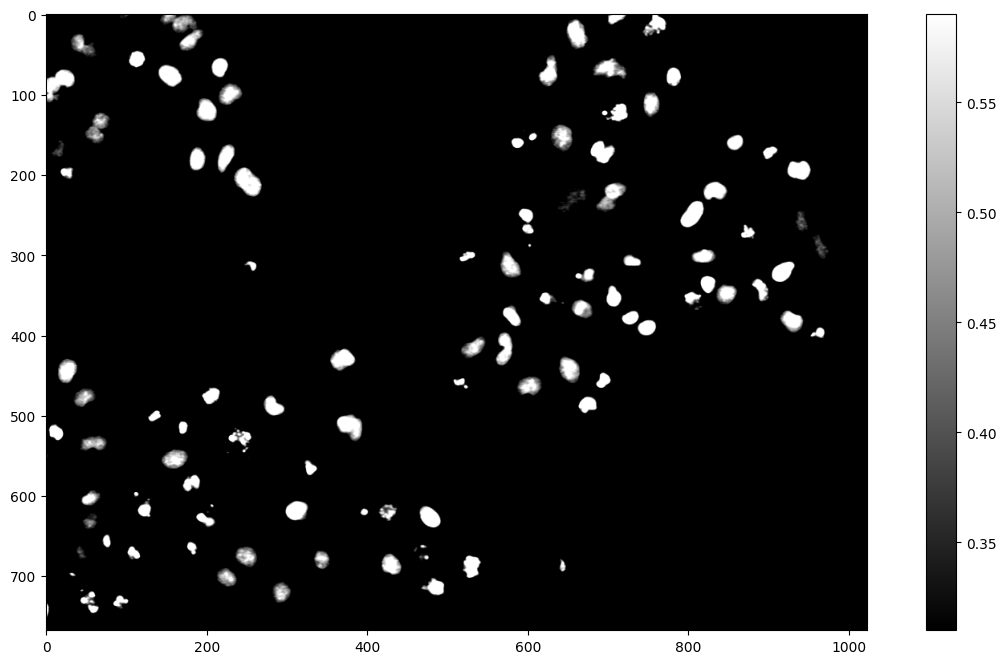

In [6]:
imgc2=img.copy()
i=0
j=0
for i in range(0, imgc2.shape[0]):
    for j in range(0, imgc2.shape[1]):
        if imgc2[i,j] <T1:
            imgc2[i, j]= T1
        elif imgc2[i,j] >T2:
            imgc2[i, j]= T2

plt.figure(figsize=(15,8))
plt.imshow(imgc2, "gray")
plt.colorbar()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

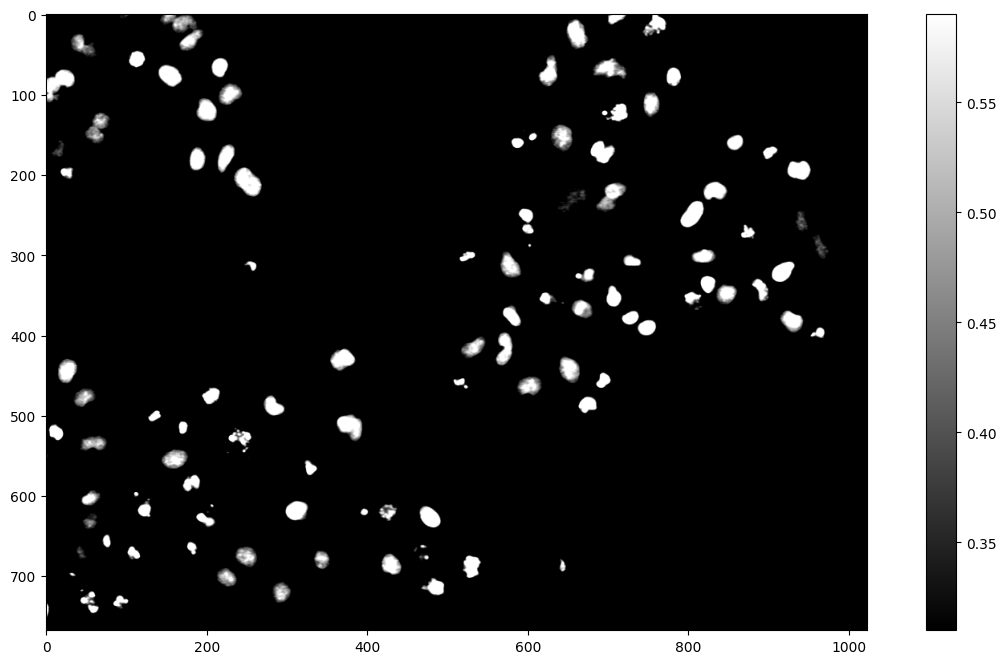

In [7]:
imgc3=img.copy()
i=0
for i in numpy.ndindex(img.shape):
    if imgc3[i[0],i[1]] <T1:
        imgc3[i[0],i[1]]= T1
    elif imgc3[i[0],i[1]] >T2:
        imgc3[i[0],i[1]]= T2
plt.figure(figsize=(15,8))
plt.imshow(imgc3, "gray")
plt.colorbar()

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the `...` line with your code:

In [8]:
def clip_image(img_in, T1, T2):
    i=0
    img_out=img_in.copy()
    for i in numpy.ndindex(img_in.shape):
        if img_in[i[0],i[1]] <T1:
            img_out[i[0],i[1]]= T1
        elif img_in[i[0],i[1]] >T2:
            img_out[i[0],i[1]]= T2
    return img_out

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img_in` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [9]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

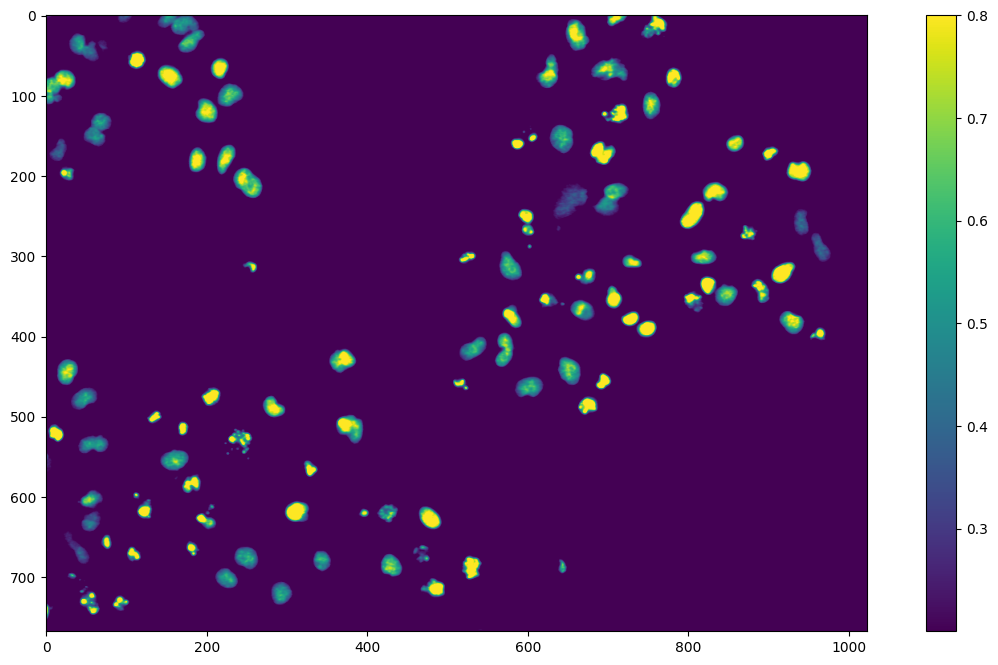

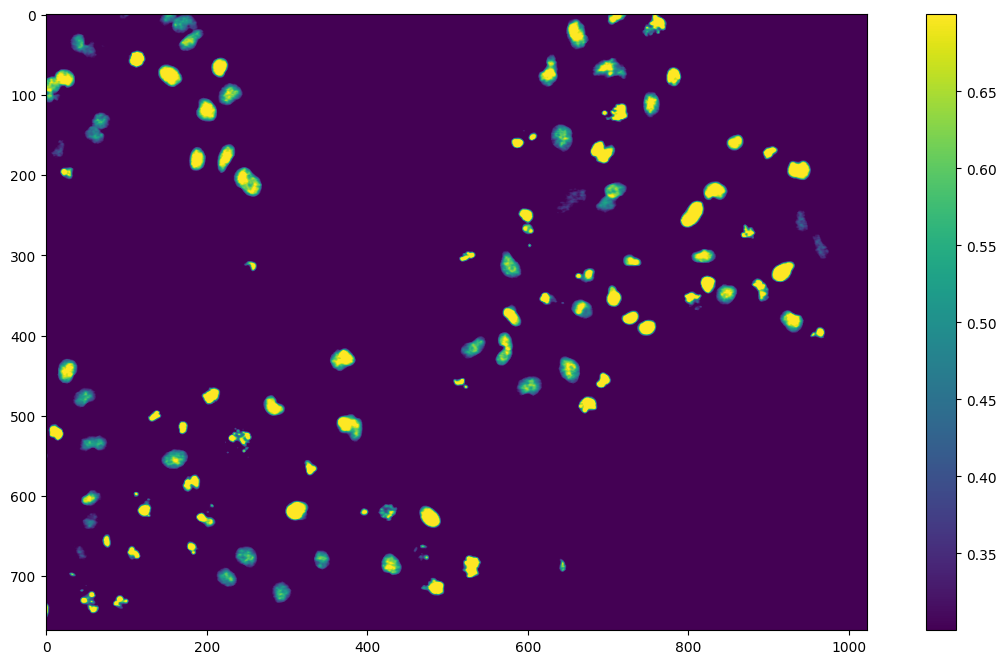

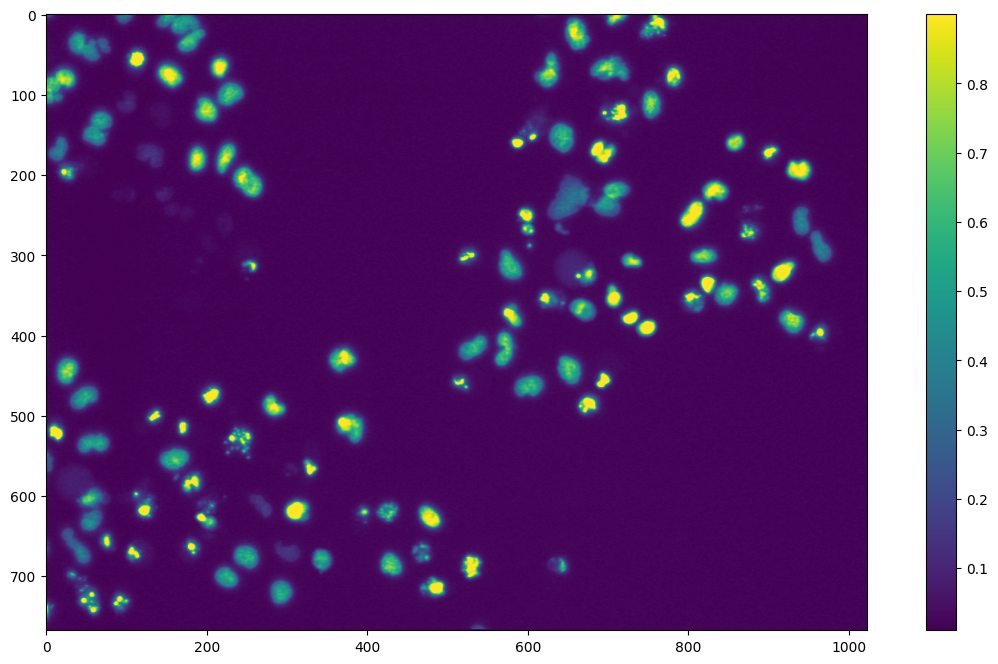

In [10]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))
plt.colorbar()

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.01, 0.9))
plt.colorbar()

# here goes your code